# Importing the tools and library

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords

import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the data

In [2]:
data = pd.read_csv("imdb TV Shows.csv")
data.head()

,Unnamed: 0,Rating (out of 10),Review,Show ID,Review ID
0,0,9,Andor was every bit as good as I was hoping fo...,tt9253284,rw10514299
1,1,10,Wow. I just finished episode 12 of the first s...,tt9253284,rw8690571
2,2,10,Andor Season 2 is the best Star Wars Show ever...,tt9253284,rw10514285
3,3,9,There were a few episodes I didn't like in bot...,tt9253284,rw10514788
4,4,9,Didnt like the new movies and even Mandalorian...,tt9253284,rw8665236


In [3]:
data.describe()

,Unnamed: 0,Rating (out of 10)
count,8319.000000,8319.000000
mean,4159.000000,8.063349
std,2401.632778,2.441713
min,0.000000,1.000000
25%,2079.500000,7.000000
50%,4159.000000,9.000000
75%,6238.500000,10.000000
max,8318.000000,10.000000


In [4]:
data.count()

Unnamed: 0            8319
Rating (out of 10)    8319
Review                8319
Show ID               8319
Review ID             8319
dtype: int64

In [5]:
data.isnull().sum()

Unnamed: 0            0
Rating (out of 10)    0
Review                0
Show ID               0
Review ID             0
dtype: int64

# Loading the stop words

In [6]:
stop_words = set(stopwords.words("english"))
print(stop_words)

{'other', "he's", "he'd", 'which', 'at', 'them', 'such', "we're", 'wasn', "they'd", 'and', "she'll", "they'll", "he'll", 'we', 's', 'when', "that'll", 'these', 'so', 'if', 'few', 'hasn', 'until', 'just', 'who', 'there', 'has', 'aren', 'while', "it'd", 'between', 'themselves', 'further', 'had', 'about', 'doing', 'out', "we'll", 'wouldn', "haven't", 'but', 'not', 'once', 'over', 'shouldn', 'than', 'my', "needn't", 'this', 'ourselves', 'up', "it'll", 'weren', 'hers', 'most', 'off', 'ours', 'to', 'won', 'after', 'ma', 'ain', 'by', "she'd", 'her', 'on', 'me', "they've", 'y', 'then', 'down', 're', "wasn't", 'through', "couldn't", 'before', 'couldn', 'above', 'it', "we've", 'each', 'the', 'will', "won't", "hadn't", 'did', "doesn't", 'very', "you'd", "don't", 'shan', 'was', "you've", 'you', 'haven', 'whom', 'does', 'where', 'here', 'he', 't', "it's", "i'd", "mustn't", 'more', 'himself', 'they', 'as', "wouldn't", 'both', "aren't", 'been', "didn't", 'only', "shan't", 'll', "you'll", 'yourself', 

# Preproccessing the data

In [7]:
def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    words = text.split()
    return " ".join(w for w in words if w not in stop_words)

data["Clean_review"] = data["Review"].apply(preprocess_text)

data.head()

,Unnamed: 0,Rating (out of 10),Review,Show ID,Review ID,Clean_review
0,0,9,Andor was every bit as good as I was hoping fo...,tt9253284,rw10514299,andor every bit good hoping might best star wa...
1,1,10,Wow. I just finished episode 12 of the first s...,tt9253284,rw8690571,wow finished episode first season show lifelon...
2,2,10,Andor Season 2 is the best Star Wars Show ever...,tt9253284,rw10514285,andor season best star wars show ever made rea...
3,3,9,There were a few episodes I didn't like in bot...,tt9253284,rw10514788,episodes like seasons finishing season say sho...
4,4,9,Didnt like the new movies and even Mandalorian...,tt9253284,rw8665236,didnt like new movies even mandalorian somehow...


In [8]:
def rating_mean(x):
    if x > 5:
        x = 'positive'
    else:
        x = 'negative'
    return x

data['Sentiment'] = data['Rating (out of 10)'].apply(rating_mean)

data

,Unnamed: 0,Rating (out of 10),Review,Show ID,Review ID,Clean_review,Sentiment
0,0,9,Andor was every bit as good as I was hoping fo...,tt9253284,rw10514299,andor every bit good hoping might best star wa...,positive
1,1,10,Wow. I just finished episode 12 of the first s...,tt9253284,rw8690571,wow finished episode first season show lifelon...,positive
2,2,10,Andor Season 2 is the best Star Wars Show ever...,tt9253284,rw10514285,andor season best star wars show ever made rea...,positive
3,3,9,There were a few episodes I didn't like in bot...,tt9253284,rw10514788,episodes like seasons finishing season say sho...,positive
4,4,9,Didnt like the new movies and even Mandalorian...,tt9253284,rw8665236,didnt like new movies even mandalorian somehow...,positive
...,...,...,...,...,...,...,...
8314,8314,5,A pointless mess. These people are disgusting ...,tt13406094,rw7210509,pointless mess people disgusting tropical sett...,negative
8315,8315,1,Just finished Season 3--save yourself the time...,tt13406094,rw8789211,finished season save time predictable lame wtf...,negative
8316,8316,5,I just finished the 6th episode and kept waiti...,tt13406094,rw8689186,finished th episode kept waiting something int...,negative
8317,8317,4,The dialogue in unreal and unbearable. A group...,tt13406094,rw8731888,dialogue unreal unbearable group miserable peo...,negative


In [9]:
h, l = 0, 0
def counter(x):
    global h, l
    if x > 5:
        h += 1
    else:
        l += 1

data['Rating (out of 10)'].apply(counter)

print("Number of negative :" ,h)
print("Number of positive :" ,l)

Number of negative : 7237
Number of positive : 1082


# Spliting the data (train and test)

In [10]:
x = data["Clean_review"]
y = data["Sentiment"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

# Evaluation the importance of a word (using TF-IDF)

In [11]:
tfidf = TfidfVectorizer()
tfidf_x_train = tfidf.fit_transform(x_train)
tfidf_x_test = tfidf.transform(x_test)

# Making the logistic regression (Classification) model

In [12]:
model = LogisticRegression()
model.fit(tfidf_x_train, y_train)

y_pred = model.predict(tfidf_x_test)

print("Accuracy :",accuracy_score(y_test, y_pred))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred))
print("Classification Report :\n",classification_report(y_test, y_pred))

Accuracy : 0.8768028846153846
Confusion Matrix :
 [[   0  205]
 [   0 1459]]
Classification Report :
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00       205
    positive       0.88      1.00      0.93      1459

    accuracy                           0.88      1664
   macro avg       0.44      0.50      0.47      1664
weighted avg       0.77      0.88      0.82      1664



C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Evaluation the importance of a word (using Count Vectorizer)

In [13]:
count_vec = CountVectorizer()
count_vec_x_train = count_vec.fit_transform(x_train)
count_vec_x_test = count_vec.transform(x_test)

# Making the Naive Bayes (Classification) model

In [14]:
model2 = MultinomialNB()
model2.fit(count_vec_x_train, y_train)

y_pred2 = model2.predict(count_vec_x_test)

print("Accuracy :",accuracy_score(y_test, y_pred2))
print("Confusion Matrix :\n",confusion_matrix(y_test, y_pred2))
print("Classification Report :\n",classification_report(y_test, y_pred2))

Accuracy : 0.8731971153846154
Confusion Matrix :
 [[  12  193]
 [  18 1441]]
Classification Report :
               precision    recall  f1-score   support

    negative       0.40      0.06      0.10       205
    positive       0.88      0.99      0.93      1459

    accuracy                           0.87      1664
   macro avg       0.64      0.52      0.52      1664
weighted avg       0.82      0.87      0.83      1664



# Preproceesing before figuring

In [15]:
positive_reviews = data[data['Sentiment'] == 'positive']['Clean_review']
negative_reviews = data[data['Sentiment'] == 'negative']['Clean_review']

tfidf_pos = tfidf.transform(positive_reviews)
tfidf_neg = tfidf.transform(negative_reviews)

pos_avg = np.asarray(tfidf_pos.mean(axis=0)).ravel()
neg_avg = np.asarray(tfidf_neg.mean(axis=0)).ravel()

vocab = tfidf.get_feature_names_out()
pos_freq = {vocab[i]: pos_avg[i] for i in range(len(vocab))}
neg_freq = {vocab[i]: neg_avg[i] for i in range(len(vocab))}

distinct_pos = {word: pos_freq[word] for word in pos_freq if pos_freq[word] > neg_freq.get(word, 0)}

distinct_neg = {word: neg_freq[word] for word in neg_freq if neg_freq[word] > pos_freq.get(word, 0)}

topN = 50
distinct_pos_top = dict(sorted(distinct_pos.items(), key=lambda x: x[1], reverse=True)[:topN])
distinct_neg_top = dict(sorted(distinct_neg.items(), key=lambda x: x[1], reverse=True)[:topN])

# Figuring the most common words

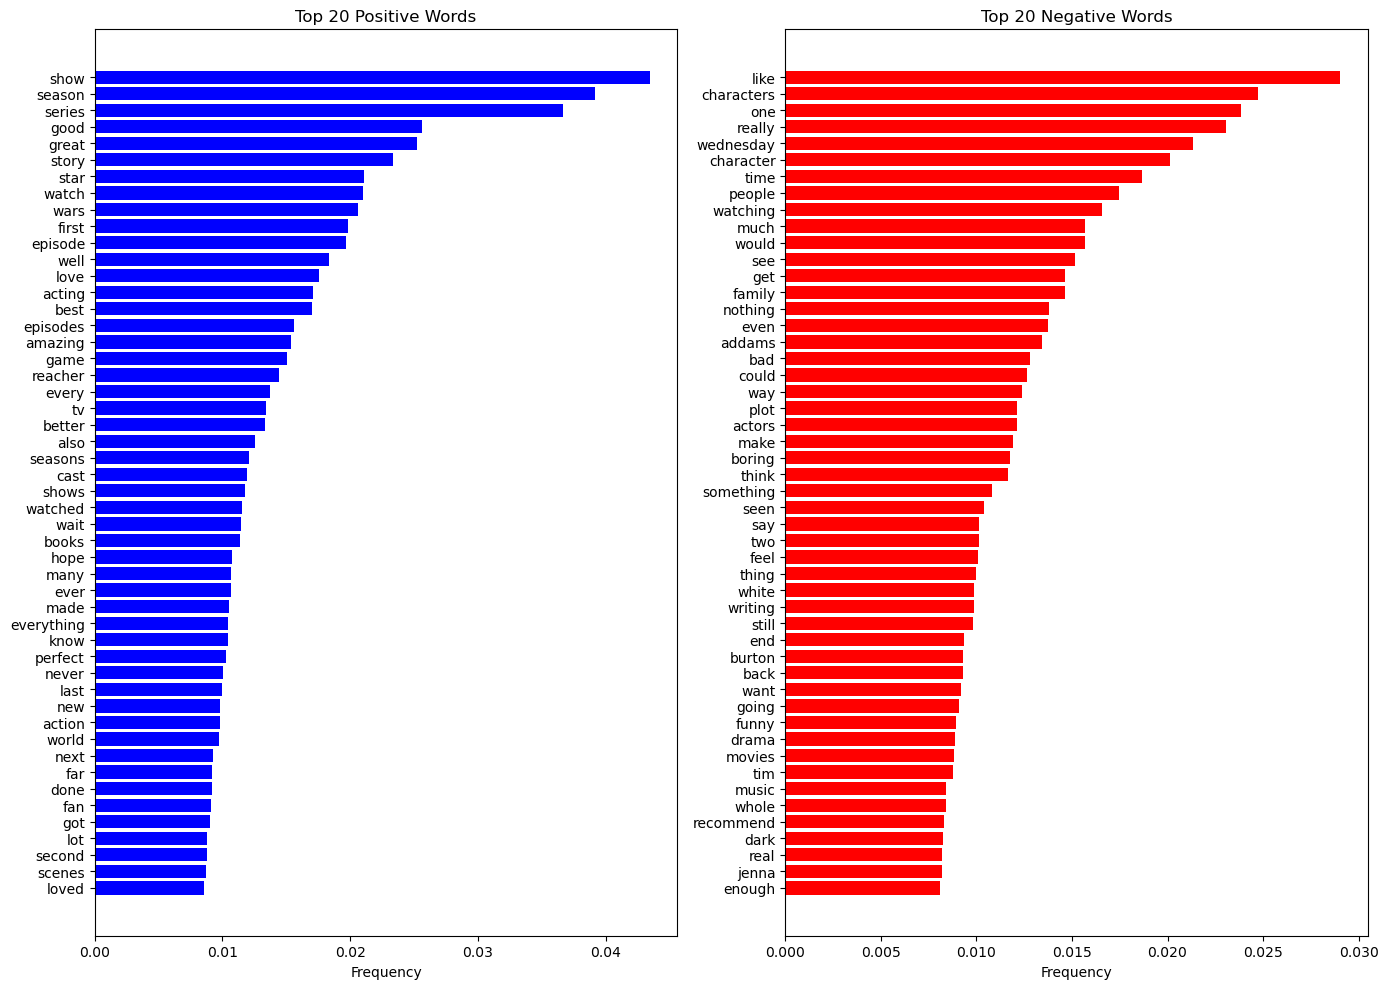

In [16]:
plt.figure(figsize=(14,10))

plt.subplot(1,2,1)
plt.barh(
    list(distinct_pos_top.keys()),
    list(distinct_pos_top.values()),
    color='blue'
)
plt.title("Top 20 Positive Words")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()

plt.subplot(1,2,2)
plt.barh(
    list(distinct_neg_top.keys()),
    list(distinct_neg_top.values()),
    color='red'
)
plt.title("Top 20 Negative Words")
plt.xlabel("Frequency")
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

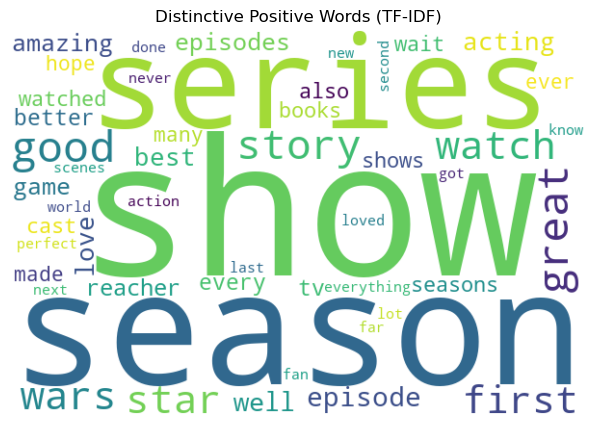

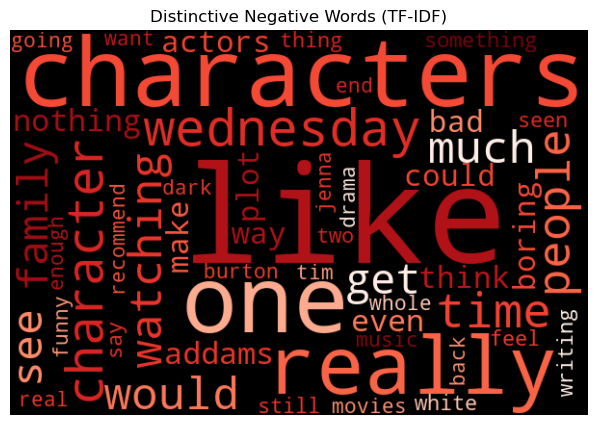

In [17]:
pos_wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(distinct_pos_top)
neg_wordcloud = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate_from_frequencies(distinct_neg_top)

plt.figure(figsize=(10,5))
plt.imshow(pos_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Distinctive Positive Words (TF-IDF)")
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(neg_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Distinctive Negative Words (TF-IDF)")
plt.show()

# Accounts
### [Linkedin](https://www.linkedin.com/in/ali-muhammed-salah/) [Kaggle](https://www.kaggle.com/alimuhammed10) [GitHub](https://github.com/ali-muhammed-salah)